In [ ]:
#---> Credit Risk prediction (supervised)--->

# Project Statement:
"To build and evaluate various classification models
to predict the risk level of loan applicants
(classified as 'low risk' or 'high risk' based on credit utilization
and payment history) and identify the best-performing model
for loan eligibility assessment."

Loan Eligibility: in real world scenario of the purpose of predicting this Risk_Flag is for "loan eligibility assessment," as stated in project statement. The implicit assumption is that customers predicted to be "low risk" would be considered eligible for loan approval, and those predicted as "high risk" would likely not be, or would require further scrutiny.
So, in the context of your project, the Risk_Flag, derived from the 'Credit Utilization Ratio' and 'Payment History' thresholds, serves as the primary indicator for determining a customer's eligibility for loan approval.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_scoring.csv to credit_scoring.csv


In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
)
import  warnings
warnings.filterwarnings("ignore")


In [ ]:
# load the datset
df = pd.read_csv("credit_scoring.csv")
# retrive the first five rows of dataset
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828,2,3289000,6.28,36,Personal Loan


In [ ]:
df.shape

(1000, 12)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')

#--> observation:  it can retrieve the all features for the credit scoring dataset

In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Marital Status,object
Education Level,object
Employment Status,object
Credit Utilization Ratio,float64
Payment History,int64
Number of Credit Accounts,int64
Loan Amount,int64
Interest Rate,float64


# Data preprocessing:

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Marital Status,0
Education Level,0
Employment Status,0
Credit Utilization Ratio,0
Payment History,0
Number of Credit Accounts,0
Loan Amount,0
Interest Rate,0


observation:No Missing Values: The output shows that every column in the dataset has a count of 0 next to it. This indicates that there are no missing or null values in any of the columns. The dataset is complete in terms of having values for each entry in every feature.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   int64  
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


Dataset Size: The dataset contains 1000 entries, indexed from 0 to 999.
Number of Columns: There are a total of 12 columns (features).
Non-Null Counts: All columns have 1000 non-null values, which means there are no missing values in this dataset.
Data Types:
There are 5 columns with an integer data type (int64).
There are 2 columns with a floating-point data type (float64).
There are 5 columns with an object data type. Object type typically represents strings in a pandas DataFrame, suggesting these columns contain categorical or textual data.
Memory Usage: The DataFrame uses approximately 93.9 KB of memory.
In summary, the dataset is complete with no missing values. It contains a mix of numerical (integer and float) and categorical (object) data types across its 12 columns.

In [ ]:
df.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


Age: The age range is from 20 to 65, with a mean of approximately 42.7 years. The standard deviation of 13.27 indicates a moderate spread in ages.
Credit Utilization Ratio: This ratio ranges from 0 to 1, with a mean of around 0.51. The standard deviation of 0.29 suggests some variation in how much credit is being used relative to the limit.
Payment History: The mean payment history is about 1452.81. The large standard deviation of 827.93 indicates significant variability in this metric.
Number of Credit Accounts: The number of accounts ranges from 1 to 10, with a mean of 5.58. The standard deviation of 2.93 shows a moderate spread in the number of accounts.
Loan Amount: Loan amounts are large, ranging from 108,000 to almost 5 million, with a mean of approximately 2.47 million. The large standard deviation of 1.39 million reflects a wide range of loan amounts.
Interest Rate: Interest rates range from 1.01% to 19.99%, with a mean of 10.69%. The standard deviation of 5.48 indicates a noticeable variation in interest rates.
Loan Term: Loan terms range from 12 to 60 months, with a mean of 37.13 months. The standard deviation of 17.44 suggests a considerable spread in loan durations.

In [ ]:
df.duplicated().sum()

np.int64(0)

observation:  in this no duplicated are in data

# Fill the missing values:

In [ ]:
imputer = SimpleImputer(strategy = 'constant')
imputed_df = imputer.fit_transform(df)
imputed_data = pd.DataFrame(imputed_df,columns = df.columns)
print("imputed dataframe all features:\n ", imputed_data)


imputed dataframe all features:
      Age  Gender Marital Status Education Level Employment Status  \
0    60    Male        Married          Master          Employed   
1    25    Male        Married     High School        Unemployed   
2    30  Female         Single          Master          Employed   
3    58  Female        Married             PhD        Unemployed   
4    32    Male        Married        Bachelor     Self-Employed   
..   ..     ...            ...             ...               ...   
995  59    Male       Divorced     High School          Employed   
996  64    Male       Divorced        Bachelor        Unemployed   
997  63  Female         Single          Master     Self-Employed   
998  51  Female        Married             PhD     Self-Employed   
999  37  Female        Married          Master     Self-Employed   

    Credit Utilization Ratio Payment History Number of Credit Accounts  \
0                       0.22            2685                         2   
1

The code above uses SimpleImputer with the 'constant' strategy to fill any missing values in the DataFrame df. Since df.isnull().sum() previously showed no missing values, applying SimpleImputer with the 'constant' strategy will not change the original DataFrame. The resulting imputed_data DataFrame will be identical to the original df. The output of the print statement will display the DataFrame, confirming that no values were imputed as there were none missing.

# Feature Engineering:

In [ ]:
# feature engineering:create a target feature is risk flag
#based upon the payment history and credit utilization ratio
# feature engineering to create new feature risk flag:
# FICO (Fair Isaac corporation)scores range with different risk categories:
credit_utilization_threshold = 0.30 # Example threshold, adjust as needed
payment_history_threshold = 1500
def derive_customer(row):
  if row['Credit Utilization Ratio']<= credit_utilization_threshold and row['Payment History']<=payment_history_threshold:
    return "low risk"
  else:
      return "high risk"

# Apply the function to create the 'risk_flag' column
df['Risk_Flag'] = df.apply(derive_customer,axis = 1)

# # Filter for low-risk customers
low_risk_customers = df[df['Risk_Flag'] == 'low risk']
print("low risk customers :\n",low_risk_customers)

print("---------------------------------------")

# filter for high risk customers
high_risk_customers = df[df["Risk_Flag"]=="high risk"]
print("high risk customers are :\n",high_risk_customers)

df["Risk_Flag"].value_counts()

low risk customers :
      Age  Gender Marital Status Education Level Employment Status  \
3     58  Female        Married             PhD        Unemployed   
9     60    Male       Divorced             PhD        Unemployed   
10    27  Female       Divorced          Master          Employed   
20    35    Male         Single             PhD     Self-Employed   
21    38  Female       Divorced             PhD          Employed   
..   ...     ...            ...             ...               ...   
979   56  Female        Married          Master     Self-Employed   
982   31    Male       Divorced     High School          Employed   
983   55    Male        Married          Master     Self-Employed   
993   46  Female       Divorced             PhD        Unemployed   
999   37  Female        Married          Master     Self-Employed   

     Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
3                        0.12             1371                          

,count
Risk_Flag,
high risk,846
low risk,154


The Risk_Flag column has been successfully created based on the defined thresholds for 'Credit Utilization Ratio' and 'Payment History'. The value_counts() method on this new column will show the number of customers categorized as 'low risk' and 'high risk' based on these rules.

The observation is that the dataset has been partitioned into two groups: those classified as 'low risk' and those classified as 'high risk' according to the criteria defined in the derive_customer function. The output of df["Risk_Flag"].value_counts() will provide the exact count of customers in each of these risk categories.

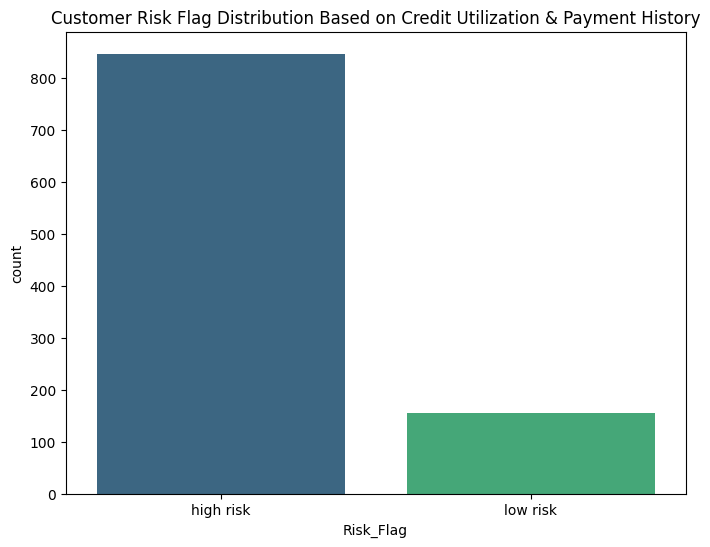

In [ ]:
# visualization of risk flag
plt.figure(figsize = (8,6))
sns.countplot(x=df["Risk_Flag"],palette = 'viridis')
plt.title("Customer Risk Flag Distribution Based on Credit Utilization & Payment History")
plt.show()

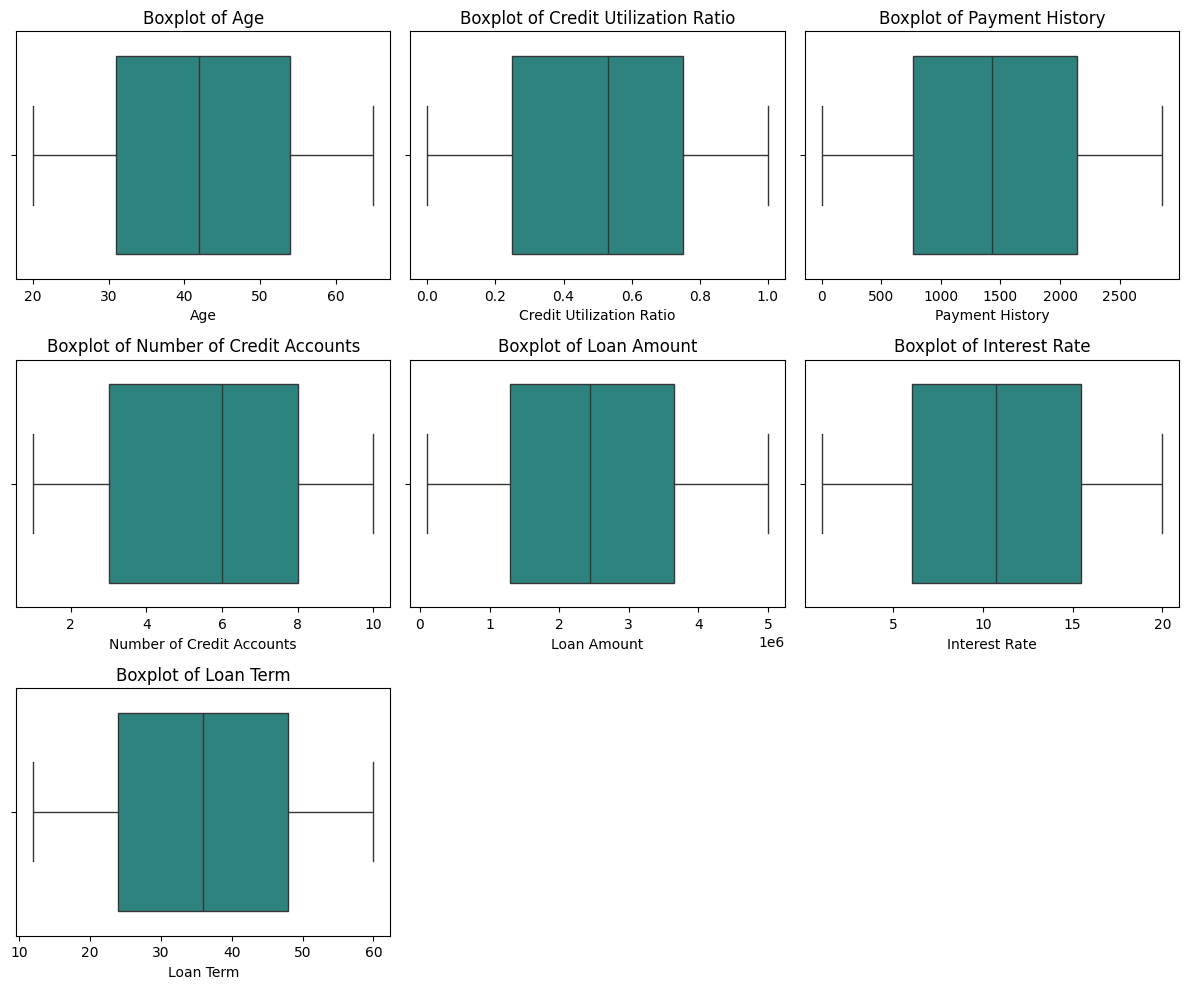

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

# Create boxplots for all numerical columns
plt.figure(figsize = (12,10))
for i,col in enumerate(numerical_cols):
  plt.subplot(3,3,i+1)
  sns.boxplot(x = df[col],palette = 'viridis')
  plt.title(f"Boxplot of {col}")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Based on the code, the observation is that boxplots are being generated for all numerical columns in the DataFrame df. These boxplots will visually display the distribution of values for each numerical feature, making it easy to identify potential outliers, the median, quartiles, and the overall spread of the data. Each subplot will show the boxplot for a single numerical column, with a title indicating the column name. The tight_layout() function is used to prevent the plot elements from overlapping.

In [ ]:
# Detect outliers using IQR
# we can use boxplot for detecting the outliers

for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1

LOWER_BOUND = Q1 -1.5 *IQR
UPPER_BOUND = Q3 +1.5 *IQR

outliers = df[(df[col]<=LOWER_BOUND) | (df[col]>=UPPER_BOUND)]
# print(f"outliers are: {col}"
print(outliers)
print(f"IQR is :{IQR}\n lower_bound is:{LOWER_BOUND}\n upper bound is :{UPPER_BOUND}")

Empty DataFrame
Columns: [Age, Gender, Marital Status, Education Level, Employment Status, Credit Utilization Ratio, Payment History, Number of Credit Accounts, Loan Amount, Interest Rate, Loan Term, Type of Loan, Risk_Flag]
Index: []
IQR is :24.0
 lower_bound is:-12.0
 upper bound is :84.0


IQR is :24.0: The Interquartile Range for the last numerical column is 24.0. This indicates the spread of the middle 50% of the data for that column.
lower_bound is:-12.0: The calculated lower bound for outlier detection in the last numerical column is -12.0. Any value below this would be considered a low outlier.
upper bound is :84.0: The calculated upper bound for outlier detection in the last numerical column is 84.0. Any value above this would be considered a high outlier.
In summary, for the last numerical column examined by the code, there are no outliers detected based on the 1.5 * IQR method, and the IQR, lower bound, and upper bound for that column are 24.0, -12.0, and 84.0 respectively.



In [ ]:
without_outliers = df[(df[col]>=LOWER_BOUND) & (df[col]<=UPPER_BOUND)]
print(without_outliers)

     Age  Gender Marital Status Education Level Employment Status  \
0     60    Male        Married          Master          Employed   
1     25    Male        Married     High School        Unemployed   
2     30  Female         Single          Master          Employed   
3     58  Female        Married             PhD        Unemployed   
4     32    Male        Married        Bachelor     Self-Employed   
..   ...     ...            ...             ...               ...   
995   59    Male       Divorced     High School          Employed   
996   64    Male       Divorced        Bachelor        Unemployed   
997   63  Female         Single          Master     Self-Employed   
998   51  Female        Married             PhD     Self-Employed   
999   37  Female        Married          Master     Self-Employed   

     Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                        0.22             2685                          2   
1                

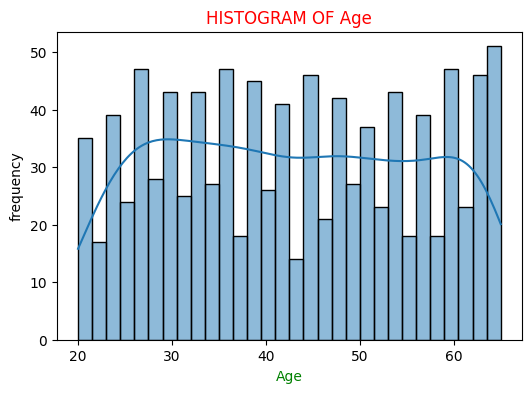

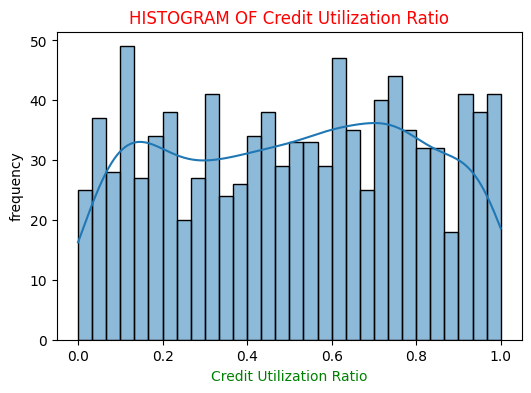

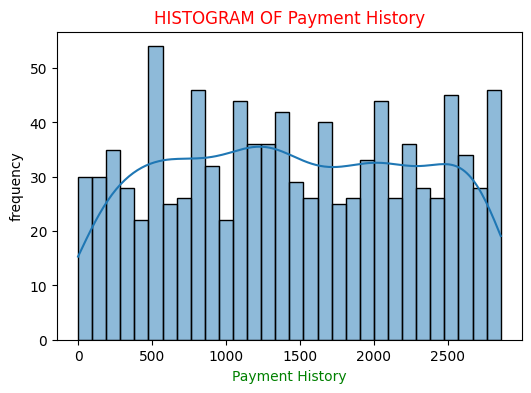

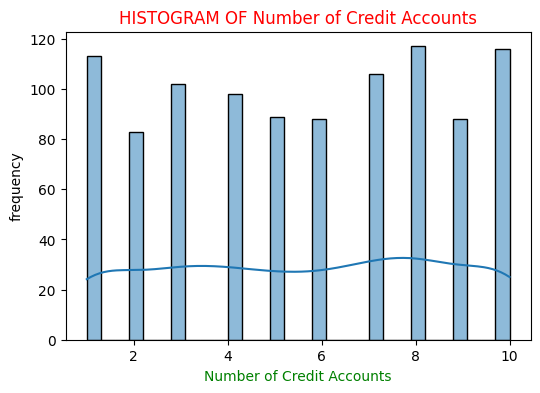

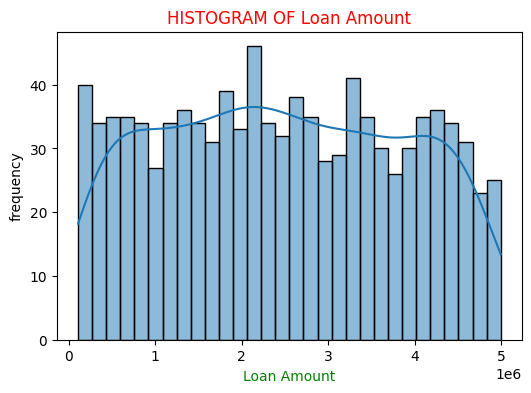

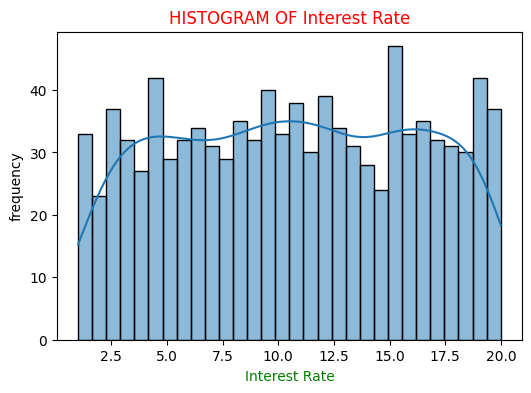

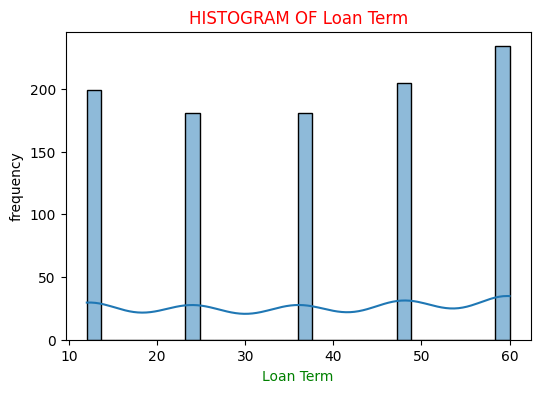

In [ ]:
# histogram
# create a histplot for each numerical columns before remove the outliers
#visualize the distribution shape of the data by smoothing it into a continuous curve

for column in df.select_dtypes(include = ['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column],kde = True,bins = 30)
    plt.title(f"HISTOGRAM OF {column}",color = "red")
    plt.xlabel(column,color = 'green')
    plt.ylabel('frequency')
plt.show()


kde=True: A Kernel Density Estimate (KDE) line will be overlaid on the histogram. This smooth line provides a visual representation of the distribution's shape.
bins=30: Each histogram will divide the data into 30 bins, showing the frequency of data points within each bin.
plt.title(...): Each histogram will have a title indicating the name of the column, displayed in red.
plt.xlabel(...): The x-axis of each histogram will be labeled with the column name, displayed in green.
plt.ylabel('frequency'): The y-axis of each histogram will be labeled as 'frequency', indicating the count of observations in each bin.
The final plt.show() will display all the generated histograms, each in its own figure. The observation is that this process creates a visual summary of the distribution of values for every numerical feature in the dataset, allowing for easy inspection of their shapes (e.g., normal, skewed, multimodal) and ranges.

In [ ]:
# check the skewness for numerical features
df.skew(numeric_only=True)

,0
Age,0.037307
Credit Utilization Ratio,-0.047891
Payment History,0.008305
Number of Credit Accounts,-0.052239
Loan Amount,0.040701
Interest Rate,-0.020069
Loan Term,-0.095345


observation:
All the numerical features in your dataset have skewness values very close to zero (both positive and negative). This indicates that their distributions are largely symmetrical and do not show significant skewness. In most cases, you wouldn't need to apply significant data transformations (like log transformations) to address skewness

Age (0.037307): The skewness value is very close to zero and slightly positive. This suggests that the distribution of Age is nearly symmetrical, with a very slight tendency towards a longer tail on the right side (higher ages).

Credit Utilization Ratio (-0.047891): The skewness value is very close to zero and slightly negative. This indicates that the distribution of Credit Utilization Ratio is nearly symmetrical, with a very slight tendency towards a longer tail on the left side (lower ratios).

Payment History (0.008305): The skewness value is very close to zero and slightly positive. This suggests that the distribution of Payment History is nearly symmetrical, with a very slight tendency towards a longer tail on the right side (higher payment history values).

Number of Credit Accounts (-0.052239): The skewness value is very close to zero and slightly negative. this indicates that the distribution of Number of Credit Accounts is nearly symmetrical, with a very slight tendency towards a longer tail on the left side (fewer accounts).

Loan Amount (0.040701): The skewness value is very close to zero and slightly positive. This suggests that the distribution of Loan Amount is nearly symmetrical, with a very slight tendency towards a longer tail on the right side (higher loan amounts).

Interest Rate (-0.020069): The skewness value is very close to zero and slightly negative. This indicates that the distribution of Interest Rate is nearly symmetrical, with a very slight tendency towards a longer tail on the left side (lower interest rates).

Loan Term (-0.095345): The skewness value is close to zero and slightly negative. This indicates that the distribution of Loan Term is nearly symmetrical, with a slight tendency towards a longer tail on the left side (shorter loan terms).

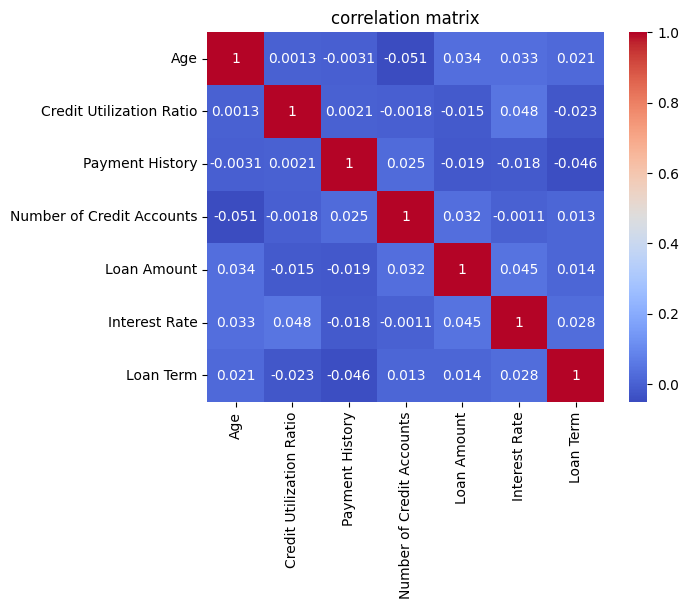

In [ ]:
# corelation
corr_matrix = df.corr(numeric_only = True)
# visualixzing the correlation matrix
sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm')
plt.title("correlation matrix")
plt.show()

The heatmap provides a visual overview of the linear relationships between the numerical features in your dataset. By examining the colors and the annotated values, you can quickly identify:

Strong positive correlations: Look for dark blue cells with values close to 1.
Strong negative correlations: Look for dark red cells with values close to -1.
Weak or no correlations: Look for cells with colors close to the center (white or light shades) and values close to 0.
This visualization is helpful for understanding which features are strongly related to each other. Highly correlated features might indicate multicollinearity, which can be an issue for some linear models. Conversely, features with low correlation might be more independent. It also helps in understanding potential relationships between features and the target variable (if it's numerical and included in the matrix).

In [ ]:
# Normal distribution use standard scaler
features = ['Age','Credit Utilization Ratio','Payment History',
            'Number of Credit Accounts','Loan Amount','Interest Rate','Loan Term','Risk_Flag']

scaler = StandardScaler()
df_selected = df[features]
scaled_data = scaler.fit_transform(df_selected)
df_normalized = pd.DataFrame(scaled_data, columns=features)

print(df_normalized)

In [ ]:
# label Encoding
categorical_features = ['Gender','Marital Status','Education Level','Employment Status','Type of Loan','Risk_Flag']
label = LabelEncoder()

for col in categorical_features:
    df[col] = label.fit_transform(df[col])

# encoding target variable:
df['Risk_Flag'] = label.fit_transform(df['Risk_Flag']) # 0-high risk,1-low risk
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Risk_Flag
0,60,1,1,2,0,0.22,2685,2,4675000,2.65,48,2,0
1,25,1,1,1,2,0.20,2371,9,3619000,5.19,60,0,0
2,30,0,2,2,0,0.22,2771,6,957000,2.76,12,0,0
3,58,0,1,3,2,0.12,1371,2,4731000,6.57,60,0,1
4,32,1,1,0,1,0.99,828,2,3289000,6.28,36,2,0


The observation is that the specified categorical columns and the target variable have been successfully transformed from their original string values into numerical representations (integers). This is a necessary step for many machine learning algorithms that require numerical input.

In [ ]:
# Feature Scaling
x = df.drop(['Risk_Flag'],axis=1)
y = df['Risk_Flag']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# split the data
x_train, x_test, y_train, y_test = train_test_split( x_scaled, y, test_size = 0.2,random_state=42,stratify = y)
print(f"training samples : {x_train.shape[0]}")
print(f"testing samples: {x_test.shape[0]}")


training samples : 800
testing samples: 200


In [ ]:
# Train the models (classification)
# Get Models
def get_models():
    return {
        'Logistic Regression': LogisticRegression(max_iter=200),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC(probability=True),
        'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10),
        'XGBoost': XGBClassifier(),
        'KNN': KNeighborsClassifier(),
    }


In [ ]:
# evaluate metrics
def evaluate_model(y_test, y_pred, y_prob=None, average='weighted'):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average=average, zero_division=0),
        'Recall': recall_score(y_test, y_pred, average=average, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average=average, zero_division=0),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred),
    }
    return metrics

In [ ]:
# train and evalulate
def train_and_evaluate(models, x_train, x_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Probability predictions if available
        y_prob = model.predict_proba(x_test) if hasattr(model, "predict_proba") else None

        metrics = evaluate_model(y_test, y_pred, y_prob)
        results[name] = metrics
        # Plot Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: {name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        plt.show()

                           # return results.pd.DataFrame(results).T
    return results


Training Logistic Regression...


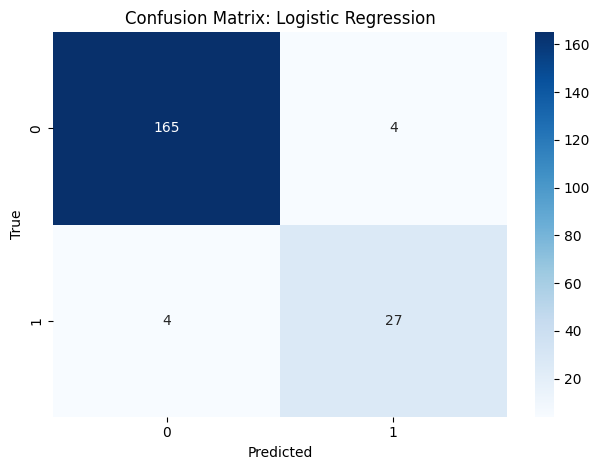


Training Random Forest...


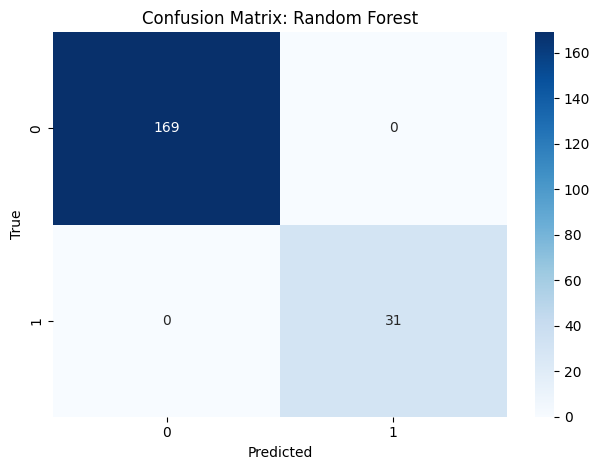


Training Decision Tree...


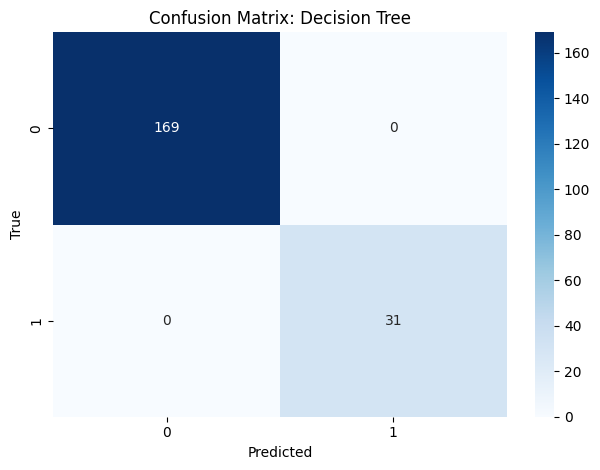


Training SVM...


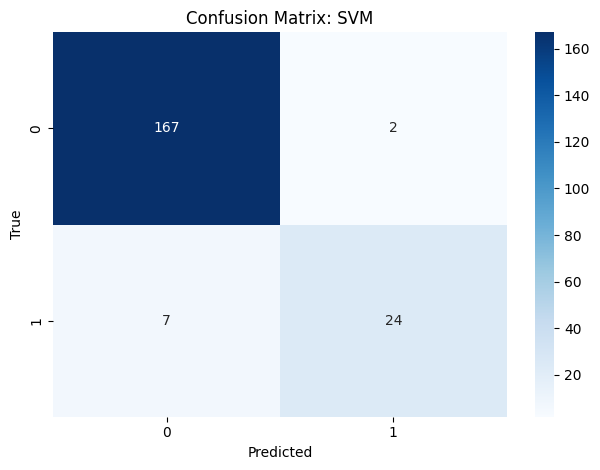


Training Bagging...


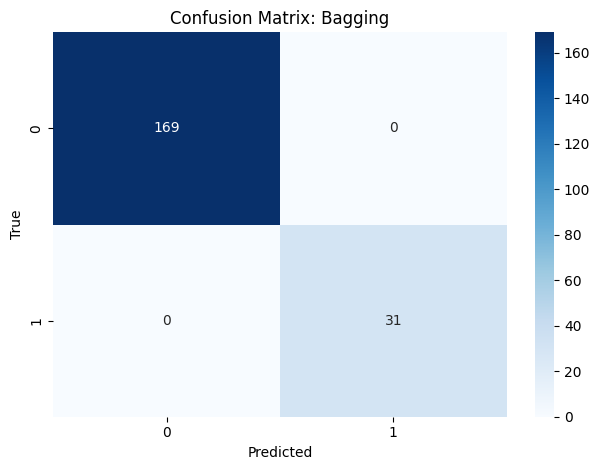


Training XGBoost...


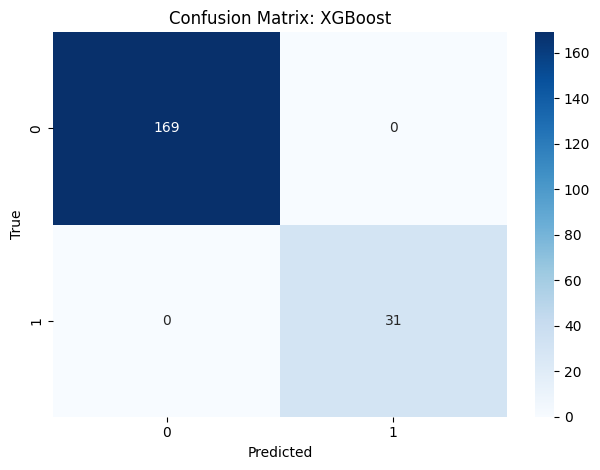


Training KNN...


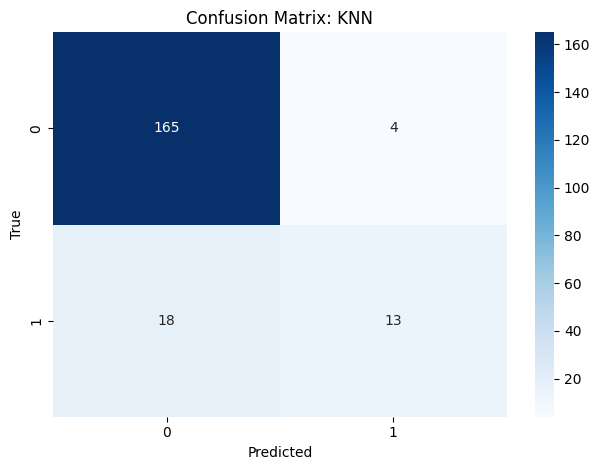


 final Evaluation metrics for all models :



,Accuracy,Precision,Recall,F1 Score,MAE,MSE,RMSE,R2 Score
Logistic Regression,0.960,0.960000,0.960,0.960000,0.040,0.040,0.040,0.694598
Random Forest,1.000,1.000000,1.000,1.000000,0.000,0.000,0.000,1.000000
Decision Tree,1.000,1.000000,1.000,1.000000,0.000,0.000,0.000,1.000000
SVM,0.955,0.954083,0.955,0.953354,0.045,0.045,0.045,0.656423
Bagging,1.000,1.000000,1.000,1.000000,0.000,0.000,0.000,1.000000
XGBoost,1.000,1.000000,1.000,1.000000,0.000,0.000,0.000,1.000000
KNN,0.890,0.880415,0.890,0.876146,0.110,0.110,0.110,0.160145


In [ ]:
models = get_models()
results = train_and_evaluate(models, x_train, x_test, y_train, y_test)
print("\n final Evaluation metrics for all models :\n")
results_df = pd.DataFrame(results).T
results_df

In [ ]:
# sorted by multiple metrics
print("models sorted by F1 Score and R2 score:")
print(results_df.sort_values(by = ["F1 Score","R2 Score"],ascending = False))

models sorted by F1 Score and R2 score:
                     Accuracy  Precision  Recall  F1 Score    MAE    MSE  \
Random Forest           1.000   1.000000   1.000  1.000000  0.000  0.000   
Decision Tree           1.000   1.000000   1.000  1.000000  0.000  0.000   
Bagging                 1.000   1.000000   1.000  1.000000  0.000  0.000   
XGBoost                 1.000   1.000000   1.000  1.000000  0.000  0.000   
Logistic Regression     0.960   0.960000   0.960  0.960000  0.040  0.040   
SVM                     0.955   0.954083   0.955  0.953354  0.045  0.045   
KNN                     0.890   0.880415   0.890  0.876146  0.110  0.110   

                      RMSE  R2 Score  
Random Forest        0.000  1.000000  
Decision Tree        0.000  1.000000  
Bagging              0.000  1.000000  
XGBoost              0.000  1.000000  
Logistic Regression  0.040  0.694598  
SVM                  0.045  0.656423  
KNN                  0.110  0.160145  


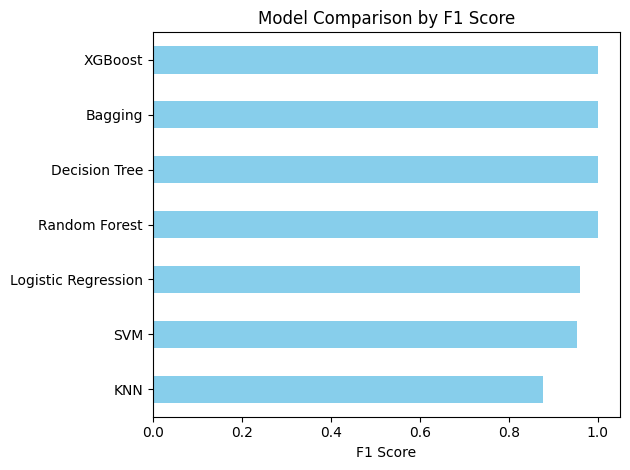

In [ ]:
# Vizualize for clarity
import matplotlib.pyplot as plt

# Plot F1 scores for all models
results_df["F1 Score"].sort_values().plot(kind='barh', title="Model Comparison by F1 Score", color='skyblue')
plt.xlabel("F1 Score")
plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame(results).T.round(4)
ranking = results_df.rank(ascending=False)
ranking["Average Rank"] = ranking.mean(axis=1)
ranking_sorted = ranking.sort_values("Average Rank")

print("📊 Ranked Models:")
print(ranking_sorted)

print("\n🏆 Best Model:")
print(ranking_sorted.index[0])

📊 Ranked Models:
                     Accuracy  Precision  Recall  F1 Score  MAE  MSE  RMSE  \
Random Forest             2.5        2.5     2.5       2.5  5.5  5.5   5.5   
Decision Tree             2.5        2.5     2.5       2.5  5.5  5.5   5.5   
XGBoost                   2.5        2.5     2.5       2.5  5.5  5.5   5.5   
Bagging                   2.5        2.5     2.5       2.5  5.5  5.5   5.5   
Logistic Regression       5.0        5.0     5.0       5.0  3.0  3.0   3.0   
SVM                       6.0        6.0     6.0       6.0  2.0  2.0   2.0   
KNN                       7.0        7.0     7.0       7.0  1.0  1.0   1.0   

                     R2 Score  Average Rank  
Random Forest             2.5         3.625  
Decision Tree             2.5         3.625  
XGBoost                   2.5         3.625  
Bagging                   2.5         3.625  
Logistic Regression       5.0         4.250  
SVM                       6.0         4.500  
KNN                       7.0       

The "Ranked Models" table shows that Random Forest, Decision Tree, XGBoost, and Bagging models share the same lowest average rank of 3.625. This suggests that these four models performed equally well on average across the metrics used for ranking. The "Best Model" is identified as "Random Forest" because it is the first model listed among those with the lowest average rank. While other models also achieved the same lowest average rank, the output specifically highlights Random Forest as the best model.

In [1]:
# project Conclusion:

conclusion:::---
Risk Categorization is Crucial: The project demonstrates that categorizing customers into risk groups (low risk vs. high risk) is a fundamental step in the loan eligibility process. Lenders use this assessment to make informed decisions about extending credit.
The risk assessment models developed in this project provide a robust mechanism for evaluating customer eligibility for loans. By accurately predicting the likelihood of a customer being low or high risk, lenders can make more informed decisions about extending credit. While the models offer a strong prediction of risk, the ultimate decision on eligibility will still involve the lender's policies, risk tolerance, and other specific loan requirements. Utilizing data-driven risk assessment tools like the ones explored in this project can significantly enhance the efficiency and effectiveness of the loan origination process.

In [ ]:
---------------end project --------------------------